In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

from numpy import linalg as LA

In [3]:
# Define the tickers
tickers = ['DIA','SPY','QQQ', 'IDEV', 'IEMG','AGG','TLT','SHY','LQD','IAGG','GLD','VNQ']
labels = ['DOw', 'S&P', 'NASDAQ', 'Developed', 'Emerging', 'US Bond Agg', 'US Long Treasury', 'US Short Treasury', 'US Corporate', 'International Bond', 'Gold', 'REITs']


In [4]:
# Fetch historical data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Collect data
data = fetch_data(tickers, '2021-09-01', '2024-09-01')
spy = fetch_data(['AOM'], '2021-09-01', '2024-09-01')

# Drop rows with missing data
data = data.dropna()
spy = spy.dropna()

# Calculate daily returns
returns = data.pct_change().fillna(0)
spy_returns = spy.pct_change().fillna(0)


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
(1+returns).sum(axis=1)/12

Date
2021-09-01 00:00:00+00:00    1.000000
2021-09-02 00:00:00+00:00    1.001553
2021-09-03 00:00:00+00:00    1.000386
2021-09-07 00:00:00+00:00    0.995481
2021-09-08 00:00:00+00:00    0.998752
                               ...   
2024-08-26 00:00:00+00:00    0.997803
2024-08-27 00:00:00+00:00    1.001070
2024-08-28 00:00:00+00:00    0.995954
2024-08-29 00:00:00+00:00    1.000375
2024-08-30 00:00:00+00:00    1.001625
Length: 754, dtype: float64

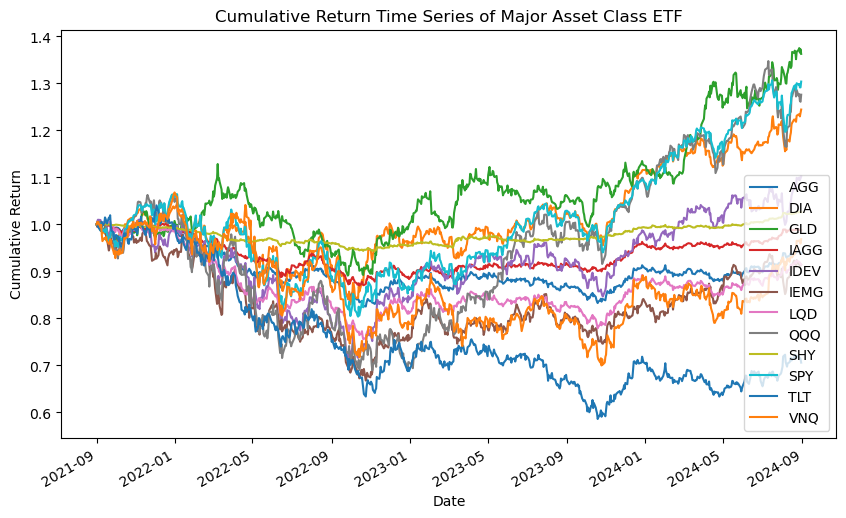

In [6]:
cum_returns = (1 + returns).cumprod()
df_cum_returns = (1+returns).cumprod()

bm_returns = (1/12)*(1+returns).sum(axis=1)
bm_cum_returns = bm_returns.cumprod()

df_cum_returns.plot(figsize=(10,6))
plt.legend(title="Stocks", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Time Series of Major Asset Class ETF")
plt.show()

Singular values: [0.71542008 0.38323424 0.24928805 0.23068451 0.18259683 0.13209493
 0.09517601 0.06460978 0.04859609 0.03282194 0.02898335 0.01146139]
VT (transposed): [[-6.45652951e-02 -2.74911520e-01  2.09718201e-02 -7.83517873e-02
   1.86947211e-02 -2.80896414e-02  3.21902420e-02 -3.64108691e-01
   1.40263263e-01 -5.32270884e-01  2.99367928e-01 -6.21545698e-01]
 [-3.22039322e-01  1.02102920e-01  1.22544021e-01  9.99924184e-02
  -1.04513390e-01 -5.68988968e-01 -6.05314063e-01 -2.88171133e-02
  -3.80921562e-02 -1.96517206e-01 -3.44298436e-01 -1.82119648e-02]
 [-9.38627309e-02 -3.04330717e-01 -6.40415304e-01  2.32525188e-01
  -6.50868603e-01  6.02271026e-02 -3.94911562e-02  6.01074060e-02
  -2.24205619e-03  3.75607060e-02 -2.11387324e-02 -8.97242834e-03]
 [-4.13442022e-02 -1.76098229e-01  3.73205040e-02 -5.44764291e-02
  -5.80718985e-04  2.30468751e-03  3.51230739e-02 -5.37245318e-01
  -7.82682766e-01  2.31749136e-01 -8.17788845e-02 -7.74581590e-03]
 [-3.63966609e-01  4.21696856e-02 -

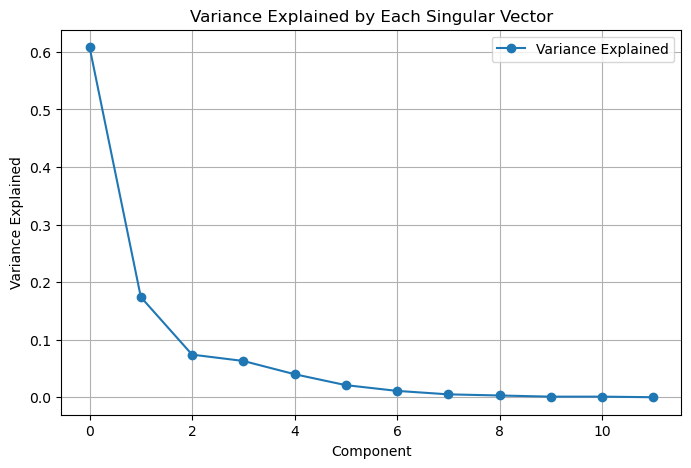

In [7]:
# Perform SVD using numpy.linalg
U, S, VT = LA.svd(returns)

# Print results
print("Singular values:", S)
print("VT (transposed):", VT.T)

# Compute variance explained by each singular vector
var_explained = np.round(S**2 / np.sum(S**2), decimals=3)
print('Variance explained by each singular vector:', var_explained)

# Plot the variance explained
plt.figure(figsize=(8, 5))
plt.plot(var_explained, 'o-', label='Variance Explained')
plt.title('Variance Explained by Each Singular Vector')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print("First Eigenfactor  VT[0] = ", VT[0])
weight_factor_1 = abs(VT[0]) / sum(abs(VT[0]))
print("First Eigen portfolio weight = ",weight_factor_1)

First Eigenfactor  VT[0] =  [-0.0645653  -0.32203932 -0.09386273 -0.0413442  -0.36396661 -0.34521271
 -0.12323039 -0.5226428  -0.01411567 -0.40950183 -0.09272447 -0.40636053]
First Eigen portfolio weight =  [0.0230626  0.11503185 0.03352759 0.01476807 0.1300082  0.12330934
 0.04401767 0.18668704 0.00504209 0.1462733  0.03312101 0.14515123]


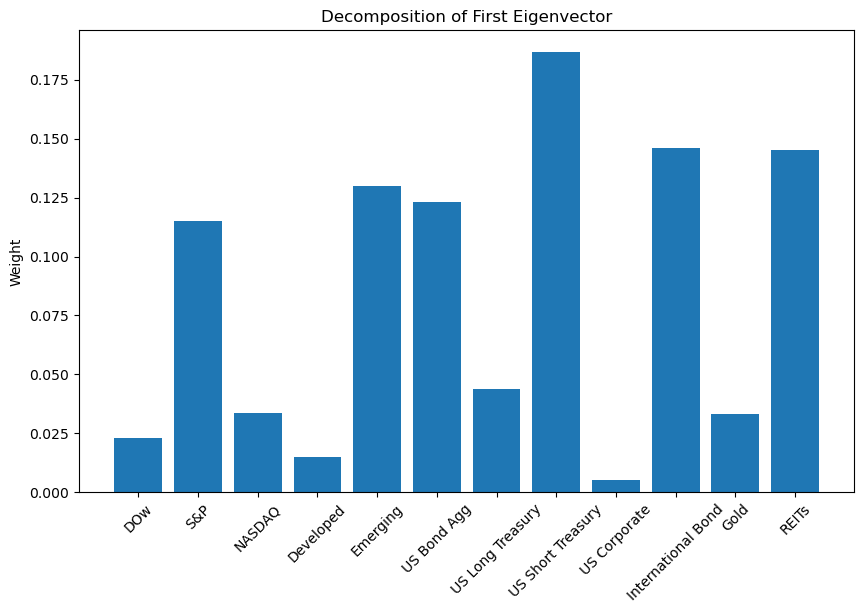

In [15]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, weight_factor_1)

# Adding labels and title
# plt.xlabel("Sectors")
plt.ylabel("Weight")
plt.xticks(rotation=45)

plt.title("Decomposition of First Eigenvector")

# Show the plot
plt.show()

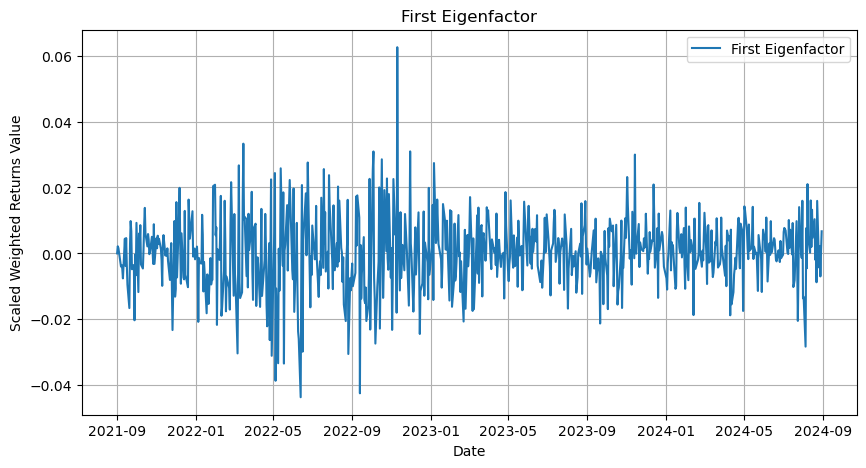

In [16]:
#First Eigenfactor
weighted_returns = returns.mul(weight_factor_1, axis=1)
scaled_weighted_returns = weighted_returns.div(np.sqrt(S[0]))

plt.figure(figsize=(10, 5))
plt.plot(scaled_weighted_returns.sum(axis=1), label='First Eigenfactor')
plt.title('First Eigenfactor')
plt.xlabel('Date')
plt.ylabel('Scaled Weighted Returns Value')
plt.legend()
plt.grid(True)
plt.show()


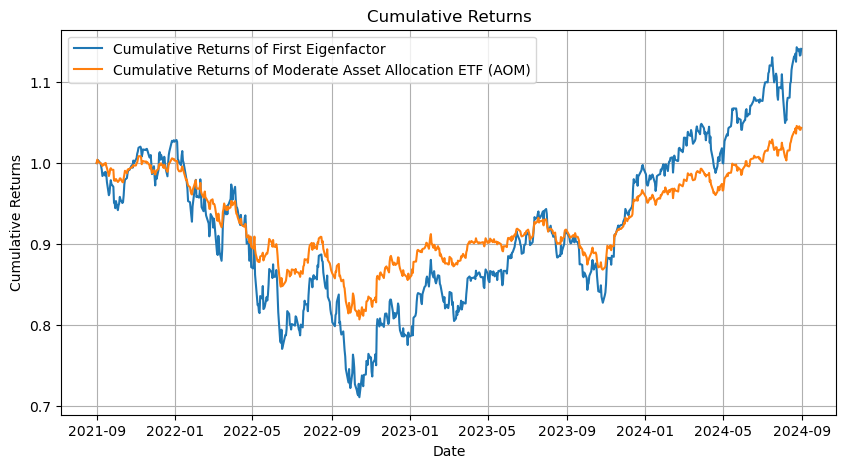

In [17]:
cumulative_returns = (1 + scaled_weighted_returns.sum(axis=1)).cumprod()
spy_cumulative_returns = (1 + spy_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns of First Eigenfactor')

plt.plot(spy_cumulative_returns, label = 'Cumulative Returns of Moderate Asset Allocation ETF (AOM)')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


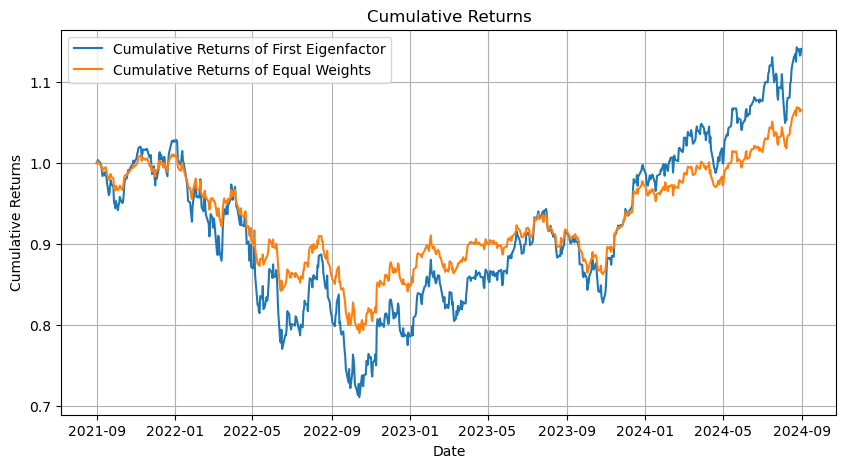

In [18]:
cumulative_returns = (1 + scaled_weighted_returns.sum(axis=1)).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns of First Eigenfactor')

plt.plot(bm_cum_returns, label = 'Cumulative Returns of Equal Weights')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:
Ticker
AGG     0.571404
DIA     0.884295
GLD     0.737998
IAGG    0.849371
IDEV    0.956079
IEMG    0.802026
LQD     0.651947
QQQ     0.943549
SHY     0.933784
SPY     0.936982
TLT     0.155907
VNQ     0.487413
dtype: float64


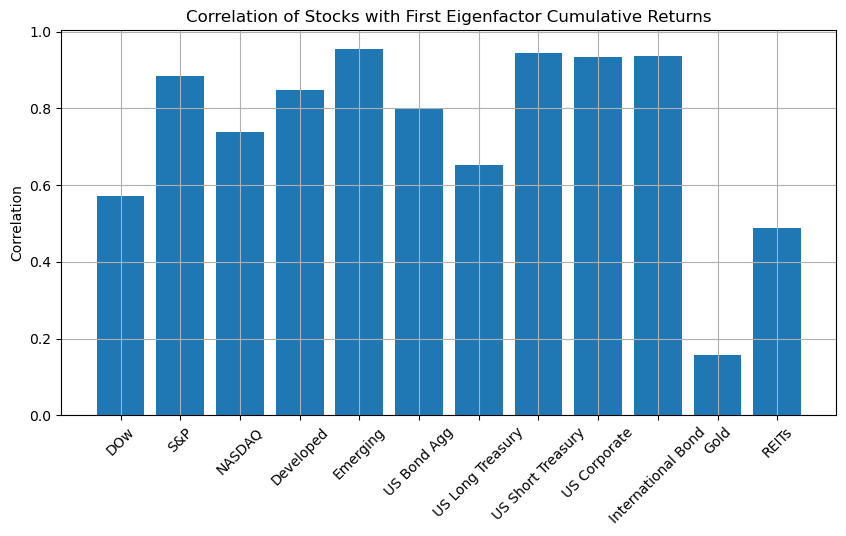

In [19]:
# Calculate cumulative returns for each stock
cumulative_returns_stocks = (1 + returns).cumprod()

# Ensure the cumulative returns of the eigenfactor is aligned in terms of dates with original data
cumulative_returns_aligned = cumulative_returns.loc[returns.index]

# Compute the correlation of each stock's cumulative returns with the eigenfactor cumulative returns
correlations = cumulative_returns_stocks.corrwith(cumulative_returns_aligned)

# Print the correlation results
print("Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:")
print(correlations)

# Optional: Plot the correlations as a bar chart for better visualization
plt.figure(figsize=(10, 5))
plt.bar(labels, correlations)
plt.title('Correlation of Stocks with First Eigenfactor Cumulative Returns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
